# Lisette

> Lisette makes LiteLLM easier to use

In [ ]:
#| hide
from cachy import enable_cachy
from lisette import patch_litellm

In [ ]:
#| hide
enable_cachy()
patch_litellm()

> **NB**: If you are reading this in GitHub's readme, we recommend you instead read the much more nicely formatted [documentation format](https://lisette.answer.ai/) of this tutorial.

_Lisette_ is a wrapper for the [LiteLLM Python SDK](https://docs.litellm.ai/), which provides unified access to 100+ LLM providers using the OpenAI API format.

LiteLLM provides a unified interface to access multiple LLMs, but it's quite low level: it leaves the developer to do a lot of stuff manually. Lisette automates pretty much everything that can be automated, whilst providing full control. Amongst the features provided:

* A `Chat` class that creates stateful dialogs across any LiteLLM-supported model
* Convenient message creation utilities for text, images, and mixed content
* Simple and convenient support for tool calling with automatic execution
* Built-in support for web search capabilities (including citations for supporting models)
* Streaming responses with formatting
* Full async support with `AsyncChat`
* Prompt caching (for supporting models)

To use Lisette, you'll need to set the appropriate API keys as environment variables for whichever LLM providers you want to use.

## Get started

LiteLLM will automatically be installed with Lisette, if you don't already have it.

In [ ]:
!pip install lisette -qq

Lisette only exports the symbols that are needed to use the library, so you can use import * to import them. Here's a quick example showing how easy it is to switch between different LLM providers:

In [ ]:
from lisette import *

## Chat

In [ ]:
models = ['claude-sonnet-4-20250514', 'gemini/gemini-2.5-flash', 'openai/gpt-4o']

for model in models:
    chat = Chat(model)
    res = chat("Please tell me about yourself in one brief sentence.")
    display(res)

I'm Claude, an AI assistant created by Anthropic to be helpful, harmless, and honest in conversations and tasks.

<details>

- id: `chatcmpl-xxx`
- model: `claude-sonnet-4-20250514`
- finish_reason: `stop`
- usage: `Usage(completion_tokens=29, prompt_tokens=17, total_tokens=46, completion_tokens_details=None, prompt_tokens_details=PromptTokensDetailsWrapper(audio_tokens=None, cached_tokens=0, text_tokens=None, image_tokens=None), cache_creation_input_tokens=0, cache_read_input_tokens=0)`

</details>

I am a large language model, trained by Google, designed to assist with information and generate text.

<details>

- id: `chatcmpl-xxx`
- model: `gemini-2.5-flash`
- finish_reason: `stop`
- usage: `Usage(completion_tokens=603, prompt_tokens=11, total_tokens=614, completion_tokens_details=CompletionTokensDetailsWrapper(accepted_prediction_tokens=None, audio_tokens=None, reasoning_tokens=583, rejected_prediction_tokens=None, text_tokens=20), prompt_tokens_details=PromptTokensDetailsWrapper(audio_tokens=None, cached_tokens=None, text_tokens=11, image_tokens=None))`

</details>

I'm an AI language model created by OpenAI, designed to assist with a wide range of questions and tasks by providing information and generating text-based responses.

<details>

- id: `chatcmpl-xxx`
- model: `gpt-4o-2024-08-06`
- finish_reason: `stop`
- usage: `Usage(completion_tokens=30, prompt_tokens=17, total_tokens=47, completion_tokens_details=CompletionTokensDetailsWrapper(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0, text_tokens=None), prompt_tokens_details=PromptTokensDetailsWrapper(audio_tokens=0, cached_tokens=0, text_tokens=None, image_tokens=None))`

</details>

That's it! Lisette handles all the provider-specific details automatically. Each model will respond in its own style, but the interface remains the same.

## Message formatting

### Multiple messages

Lisette accepts multiple messages in one go:

In [ ]:
chat = Chat(models[0])
res = chat(['Hi! My favorite drink coffee.', 'Hello!', 'Whats my favorite drink?'])
display(res)

Hello! Based on what you just told me, your favorite drink is coffee! ☕

<details>

- id: `chatcmpl-xxx`
- model: `claude-sonnet-4-20250514`
- finish_reason: `stop`
- usage: `Usage(completion_tokens=22, prompt_tokens=23, total_tokens=45, completion_tokens_details=None, prompt_tokens_details=PromptTokensDetailsWrapper(audio_tokens=None, cached_tokens=0, text_tokens=None, image_tokens=None), cache_creation_input_tokens=0, cache_read_input_tokens=0)`

</details>

If you have a pre-existing message history, you can also pass it when you create the `Chat` object:

In [ ]:
chat = Chat(models[0],hist=['Hi! My favorite drink is coffee.', 'Hello!'])
res = chat('Whats my favorite drink?')
display(res)

Your favorite drink is coffee! You just mentioned that in your previous message.

<details>

- id: `chatcmpl-xxx`
- model: `claude-sonnet-4-20250514`
- finish_reason: `stop`
- usage: `Usage(completion_tokens=18, prompt_tokens=30, total_tokens=48, completion_tokens_details=None, prompt_tokens_details=PromptTokensDetailsWrapper(audio_tokens=None, cached_tokens=0, text_tokens=None, image_tokens=None), cache_creation_input_tokens=0, cache_read_input_tokens=0)`

</details>

### Images

Lisette also makes it easy to include images in your prompts:

In [ ]:
from pathlib import Path
from IPython.display import Image

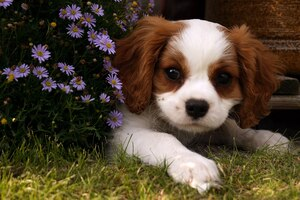

In [ ]:
fn = Path('samples/puppy.jpg')
img = fn.read_bytes()
Image(img)

All you have to do is read it in as bytes:

In [ ]:
img[:20]

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00'

And you can pass it inside a `Chat` object:

In [ ]:
chat = Chat(models[0])
chat([img, "What's in this image? Be brief."])

A cute puppy with brown and white fur lying on grass next to purple flowers.

<details>

- id: `chatcmpl-xxx`
- model: `claude-sonnet-4-20250514`
- finish_reason: `stop`
- usage: `Usage(completion_tokens=20, prompt_tokens=108, total_tokens=128, completion_tokens_details=None, prompt_tokens_details=PromptTokensDetailsWrapper(audio_tokens=None, cached_tokens=0, text_tokens=None, image_tokens=None), cache_creation_input_tokens=0, cache_read_input_tokens=0)`

</details>

### Prefill
Some providers (e.g. Anthropic) support `prefill`, allowing you to specify how the assistant's response should begin:"



In [ ]:
chat = Chat(models[0])
chat("Concisely, what's the meaning of life?", prefill="According to Douglas Adams,")

According to Douglas Adams,it's 42.

More seriously, there's no universal answer. Common perspectives include:
- Creating meaning through relationships, growth, and contribution
- Fulfilling a divine purpose or spiritual calling
- Maximizing well-being and minimizing suffering
- Leaving a positive legacy
- Simply experiencing and appreciating existence itself

The meaning might be something you create rather than discover.

<details>

- id: `chatcmpl-xxx`
- model: `claude-sonnet-4-20250514`
- finish_reason: `stop`
- usage: `Usage(completion_tokens=84, prompt_tokens=24, total_tokens=108, completion_tokens_details=None, prompt_tokens_details=PromptTokensDetailsWrapper(audio_tokens=None, cached_tokens=0, text_tokens=None, image_tokens=None), cache_creation_input_tokens=0, cache_read_input_tokens=0)`

</details>

## Tools

Lisette makes it easy to give LLMs access to Python functions. Just define a function with type hints and a docstring:

In [ ]:
def add_numbers(
    a: int,  # First number to add
    b: int   # Second number to add  
) -> int:
    "Add two numbers together"
    return a + b

Now pass the function to `Chat` and the model can use it automatically:

In [ ]:
chat = Chat(models[0], tools=[add_numbers])
res = chat("What's 47 + 23? Use the tool.")
res



The result of 47 + 23 is 70.

<details>

- id: `chatcmpl-xxx`
- model: `claude-sonnet-4-20250514`
- finish_reason: `stop`
- usage: `Usage(completion_tokens=18, prompt_tokens=573, total_tokens=591, completion_tokens_details=None, prompt_tokens_details=PromptTokensDetailsWrapper(audio_tokens=None, cached_tokens=0, text_tokens=None, image_tokens=None), cache_creation_input_tokens=0, cache_read_input_tokens=0)`

</details>

If you want to see all intermediate messages and outputs you can use the `return_all=True` feature.

In [ ]:
chat = Chat(models[0], tools=[add_numbers])
res = chat("What's 47 + 23 + 59? Use the tool.",max_steps=3,return_all=True)
display(*res)

I'll help you calculate 47 + 23 + 59 using the add_numbers tool. Since the tool can only add two numbers at a time, I'll need to do this in two steps.

🔧 add_numbers({"a": 47, "b": 23})


<details>

- id: `chatcmpl-xxx`
- model: `claude-sonnet-4-20250514`
- finish_reason: `tool_calls`
- usage: `Usage(completion_tokens=116, prompt_tokens=433, total_tokens=549, completion_tokens_details=None, prompt_tokens_details=PromptTokensDetailsWrapper(audio_tokens=None, cached_tokens=0, text_tokens=None, image_tokens=None), cache_creation_input_tokens=0, cache_read_input_tokens=0)`

</details>

{'tool_call_id': 'toolu_01F9oakoP8ANHkTMD1DyQDi7',
 'role': 'tool',
 'name': 'add_numbers',
 'content': '70'}

Now I'll add the result (70) to the third number (59):

🔧 add_numbers({"a": 70, "b": 59})


<details>

- id: `chatcmpl-xxx`
- model: `claude-sonnet-4-20250514`
- finish_reason: `tool_calls`
- usage: `Usage(completion_tokens=87, prompt_tokens=562, total_tokens=649, completion_tokens_details=None, prompt_tokens_details=PromptTokensDetailsWrapper(audio_tokens=None, cached_tokens=0, text_tokens=None, image_tokens=None), cache_creation_input_tokens=0, cache_read_input_tokens=0)`

</details>

{'tool_call_id': 'toolu_01Cdf3FHJdbx64F8H8ooE1Db',
 'role': 'tool',
 'name': 'add_numbers',
 'content': '129'}



The answer is **129**.

I calculated this by first adding 47 + 23 = 70, then adding 70 + 59 = 129.

<details>

- id: `chatcmpl-xxx`
- model: `claude-sonnet-4-20250514`
- finish_reason: `stop`
- usage: `Usage(completion_tokens=41, prompt_tokens=702, total_tokens=743, completion_tokens_details=None, prompt_tokens_details=PromptTokensDetailsWrapper(audio_tokens=None, cached_tokens=0, text_tokens=None, image_tokens=None), cache_creation_input_tokens=0, cache_read_input_tokens=0)`

</details>

It shows the intermediate tool calls, and the tool results!

## Web search

Some models support web search capabilities. Lisette makes this easy to use:

In [ ]:
chat = Chat(models[0], search='l')  # 'l'ow, 'm'edium, or 'h'igh search context
res = chat("Please tell me one fun fact about otters. Keep it brief")
res

Here's a fun fact about otters: Sea otters allow themselves to get entangled in kelp forests - this creates a tether so they don't drift away on sleep currents as they sleep. They essentially use kelp as a natural anchor to stay in place while floating and resting on the water's surface!

<details>

- id: `chatcmpl-xxx`
- model: `claude-sonnet-4-20250514`
- finish_reason: `stop`
- usage: `Usage(completion_tokens=143, prompt_tokens=15626, total_tokens=15769, completion_tokens_details=None, prompt_tokens_details=PromptTokensDetailsWrapper(audio_tokens=None, cached_tokens=0, text_tokens=None, image_tokens=None), server_tool_use=ServerToolUse(web_search_requests=1), cache_creation_input_tokens=0, cache_read_input_tokens=0)`

</details>

::: {.callout-tip}
Some providers (like Anthropic) provide citations for their search results.
:::

In [ ]:
res.choices[0].message.provider_specific_fields

{'citations': [[{'type': 'web_search_result_location',
    'cited_text': 'Sea Otters allow themselves to get entangled in kelp forests this creates a tether so they don’t drift away on sleep currents as they sleep. ',
    'url': 'https://www.mygreenworld.org/blog/facts-about-otters',
    'title': 'Five Fast Facts about Otters — My Green World',
    'encrypted_index': 'EpABCioIBxgCIiQ4ODk4YTFkYy0yMTNkLTRhNmYtOTljYi03ZTBlNTUzZDc0NWISDCMi/kxdYrQXVUX+ZxoMVvW3BHE29cyMhwAFIjBZEBw3PaH+XAslsXWMNucD7FqSwe5Fnnsfh2RzTX9x/q9XQ1Mm1Ke6JOreehNzVI0qFDkJYT4NCX8U4CjHHwoyLKtY66vhGAQ='}]],
 'thinking_blocks': None}

## Streaming

For real-time responses, use `stream=True` to get chunks as they're generated rather than waiting for the complete response:

In [ ]:
chat = Chat(models[0])
res_gen = chat("Concisely, what are the top 10 biggest animals?", stream=True)
res_gen

<generator object Chat._call>

In [ ]:
from litellm import ModelResponse, ModelResponseStream

You can loop over the generator to get the partial responses:

In [ ]:
for chunk in res_gen:
    if isinstance(chunk,ModelResponseStream): print(chunk.choices[0].delta.content,end='')

Here are the top 10 biggest animals by size/weight:

1. **Blue whale** - largest animal ever, up to 100 feet long
2. **Fin whale** - second-largest whale, up to 85 feet
3. **Bowhead whale** - up to 65 feet, very heavy build
4. **Right whale** - up to 60 feet, extremely bulky
5. **Sperm whale** - up to 67 feet, largest toothed whale
6. **Gray whale** - up to 50 feet
7. **Humpback whale** - up to 52 feet
8. **African elephant** - largest land animal, up to 13 feet tall
9. **Colossal squid** - up to 46 feet long (largest invertebrate)
10. **Giraffe** - tallest animal, up to 18 feet tall

*Note: Various whale species dominate due to the ocean's ability to support massive body sizes.*None

And the final chunk is the complete `ModelResponse`:

In [ ]:
chunk

Here are the top 10 biggest animals by size/weight:

1. **Blue whale** - largest animal ever, up to 100 feet long
2. **Fin whale** - second-largest whale, up to 85 feet
3. **Bowhead whale** - up to 65 feet, very heavy build
4. **Right whale** - up to 60 feet, extremely bulky
5. **Sperm whale** - up to 67 feet, largest toothed whale
6. **Gray whale** - up to 50 feet
7. **Humpback whale** - up to 52 feet
8. **African elephant** - largest land animal, up to 13 feet tall
9. **Colossal squid** - up to 46 feet long (largest invertebrate)
10. **Giraffe** - tallest animal, up to 18 feet tall

*Note: Various whale species dominate due to the ocean's ability to support massive body sizes.*

<details>

- id: `chatcmpl-xxx`
- model: `claude-sonnet-4-20250514`
- finish_reason: `stop`
- usage: `Usage(completion_tokens=233, prompt_tokens=22, total_tokens=255, completion_tokens_details=CompletionTokensDetailsWrapper(accepted_prediction_tokens=None, audio_tokens=None, reasoning_tokens=0, rejected_prediction_tokens=None, text_tokens=None), prompt_tokens_details=None)`

</details>

## Async

For web applications and concurrent operations, like in [FastHTML](https://fastht.ml), we recommend using `AsyncChat`:

In [ ]:
chat = AsyncChat(models[0])
await chat("Hi there")

Hello! How are you doing today? Is there anything I can help you with?

<details>

- id: `chatcmpl-xxx`
- model: `claude-sonnet-4-20250514`
- finish_reason: `stop`
- usage: `Usage(completion_tokens=20, prompt_tokens=9, total_tokens=29, completion_tokens_details=None, prompt_tokens_details=PromptTokensDetailsWrapper(audio_tokens=None, cached_tokens=0, text_tokens=None, image_tokens=None), cache_creation_input_tokens=0, cache_read_input_tokens=0)`

</details>

To wrap up, we'll show an example of async + streaming + toolcalling + search:

In [ ]:
chat = AsyncChat(models[0], search='l', tools=[add_numbers])
res = await chat("""\
Search the web for the avg weight, in kgs, of male African and Asian elephants. Then add the two.
Keep your replies ultra concise! Dont search the web more than once please.
""", max_steps=4, stream=True)
await adisplay_stream(res)  # this is a convenience function to make async streaming look great in notebooks!

Based on the search results:

**Male African elephants**: [*](https://www.africa-safaris.com/How-Much-Does-An-Elephant-Weigh "How Much Does An Elephant Weigh") [*](https://www.quora.com/What-is-the-average-weight-of-an-adult-African-elephant-in-pounds-and-tons "What is the average weight of an adult African elephant in pounds and tons? - Quora") Average weight is 5,000 kg (11,000 pounds)

**Male Asian elephants**: [*](https://www.ifaw.org/international/journal/difference-african-asian-elephants "African Elephants vs. Asian Elephants | IFAW") [*](https://www.ifaw.org/international/journal/difference-african-asian-elephants "African Elephants vs. Asian Elephants | IFAW") Average weight is 3,600 kg (7,900 pounds)
<details class='tool-usage-details'>

 `add_numbers({"a": 5000, "b": 3600})`
  - `8600`

</details>

**Total**: 8,600 kg

## Next steps

Ready to dive deeper?

- Check out the rest of the [documentation](https://lisette.answer.ai/core.html).
- Visit the [GitHub repository](https://github.com/answerdotai/lisette) to contribute or report issues.
- Join our [Discord community](https://discord.gg/y7cDEX7r)!